You can Install tensorflow on Jupyter Notebook to manipulate image

In [7]:
pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.5.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ----------------------- -------------- 30.7/48.7 kB 640.0 kB/s eta 0:00:01
     ------------------------------- ------ 41.0/48.7 kB 393.8 kB/s eta 0:00:01
     -------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path='Downloads/Image_Classification/Train_Label'
data_valid_path='Downloads/Image_Classification/Valid_Label'
data_test_path='Downloads/Image_Classification/Test_Label'

In [3]:
img_width=180
img_height=180

In [4]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 84 files belonging to 3 classes.


In [5]:
data_cat=data_train.class_names

In [6]:
data_valid=tf.keras.utils.image_dataset_from_directory(
    data_valid_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 12 files belonging to 3 classes.


In [7]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 24 files belonging to 3 classes.


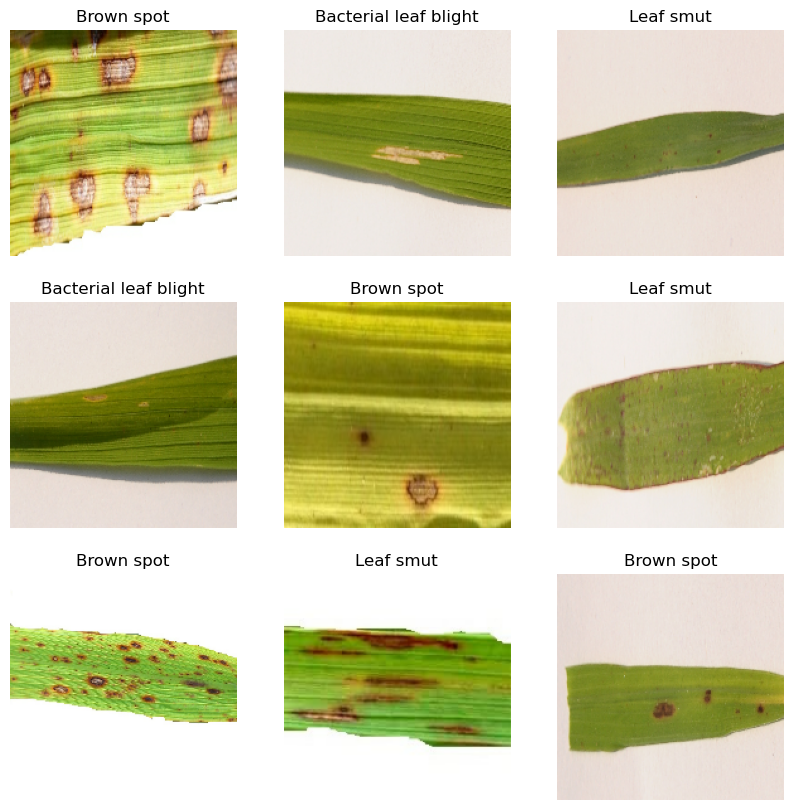

In [8]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model=Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'] )

In [13]:
epochs_size=25
history=model.fit(data_train, validation_data=data_valid, epochs=epochs_size)

Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 484ms/step - accuracy: 0.2818 - loss: 4.8675 - val_accuracy: 0.3333 - val_loss: 2.6872
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.5061 - loss: 2.6671 - val_accuracy: 0.4167 - val_loss: 1.7403
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.5472 - loss: 1.3723 - val_accuracy: 0.4167 - val_loss: 1.1051
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.5941 - loss: 0.9438 - val_accuracy: 0.5000 - val_loss: 1.0744
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.7318 - loss: 0.8116 - val_accuracy: 0.3333 - val_loss: 1.1279
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.6696 - loss: 0.7589 - val_accuracy: 0.4167 - val_loss: 1.0773
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.7857 - loss: 0.6325 - val_accuracy: 0.5000 - val_loss: 1.1166
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.8544 - loss: 0.4710 - val_accuracy: 0.5000 - val_loss:

Text(0.5, 1.0, 'Loss')

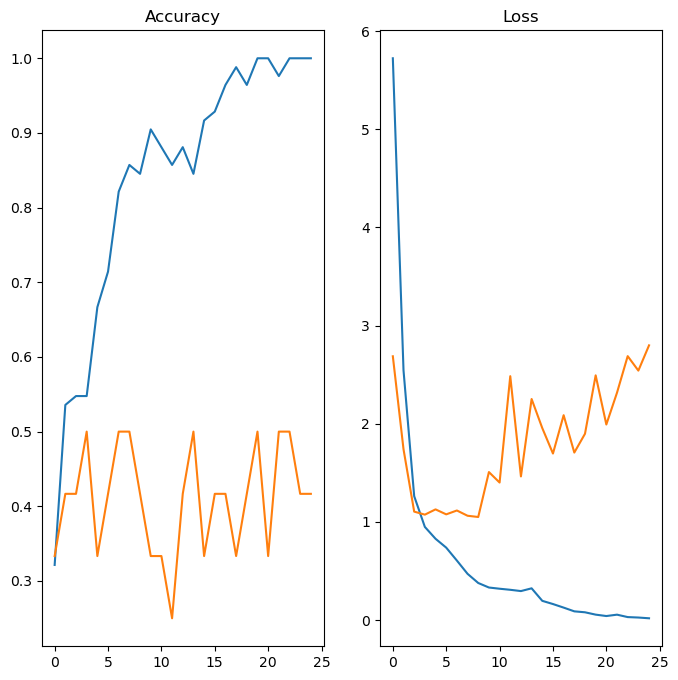

In [14]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'], label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'], label='Validation Loss')
plt.title('Loss')

In [21]:
image = 'Downloads/Image_Classification/Test_Label/Bacterial leaf blight/DSC_0403.JPG'
image=tf.keras.utils.load_img(image, target_size=(img_height,img_width))  
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [22]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [23]:
score=tf.nn.softmax(predict)

In [24]:
print('Value is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Value is Bacterial leaf blight with accuracy of 72.31
